In [36]:
import pickle
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from scipy.cluster.hierarchy import dendrogram, linkage

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\craut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pickle.load(open("df_concat.pickle","rb"))
len(df)
data_ls = [[r["song"],r["artist"],r["word_intersect_counter"]]for i,r in df.iterrows()]
dominating = []

In [3]:
df.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [4]:
word = pickle.load(open("bag_of_words_concat.pickle","rb"))
word.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


In [5]:
len(word)

39300

In [6]:
HS = pd.read_csv('Hot Stuff.csv')
HS.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/2012-1...,12/15/2012,21,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,28.0,21,11
1,http://www.billboard.com/charts/hot-100/2012-1...,12/22/2012,14,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,21.0,14,12
2,http://www.billboard.com/charts/hot-100/2012-1...,12/29/2012,12,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,14.0,12,13
3,http://www.billboard.com/charts/hot-100/2013-0...,1/5/2013,11,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,12.0,11,14
4,http://www.billboard.com/charts/hot-100/2013-0...,1/12/2013,15,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,11.0,11,15


In [7]:
songs_releasedate = {}
for i,r in HS.iterrows():
    s,a = r["Song"].lower(),r["Performer"].lower()
    patt = r'(\d+)/(\d+)/(\d+)'
    mat = re.match(patt,r["WeekID"])
    t = int(mat.group(3))+(int(mat.group(1))-1)/12
    if (s,a) not in songs_releasedate or t < songs_releasedate[(s,a)]:
        songs_releasedate[(s,a)] = t
releases = pd.DataFrame([[s,a,songs_releasedate[(s,a)]] for s,a in songs_releasedate],columns=["name","artist","release"])
releases.head()

,name,artist,release
0,don't you worry child,swedish house mafia featuring john martin,2012.750000
1,don't you worry,don gardner and dee dee ford,1962.583333
2,don't you write her off,"mcguinn, clark & hillman",1979.166667
3,don't,billy currington,2008.833333
4,don't,bryson tiller,2015.750000


In [8]:
temp_init = lambda: (10**6,10**6)
songs_peak = {}
songs_dur = {}
for i,r in HS.iterrows():
    s,a = r["Song"].lower(),r["Performer"].lower()
    if (s,a) not in songs_peak or songs_peak[(s,a)] > int(r["Peak Position"]):
        songs_peak[(s,a)] = int(r["Peak Position"])
    if (s,a) not in songs_dur or songs_dur[(s,a)] < int(r["Weeks on Chart"]):
        songs_dur[(s,a)] = int(r["Weeks on Chart"])
print(len(songs_peak))
print(len(songs_dur))

27945
27945


In [9]:
pop = pd.DataFrame([[s,a,songs_peak[(s,a)],songs_dur[(s,a)]] for s,a in songs_peak],columns=["name","artist","peak","duration"])
pop.head()

,name,artist,peak,duration
0,don't you worry child,swedish house mafia featuring john martin,6,33
1,don't you worry,don gardner and dee dee ford,66,7
2,don't you write her off,"mcguinn, clark & hillman",33,11
3,don't,billy currington,52,20
4,don't,bryson tiller,13,34


In [10]:
cons_info = pd.DataFrame([[s,a,songs_releasedate[(s,a)],songs_peak[(s,a)],songs_dur[(s,a)]] for s,a in songs_peak],columns=["name","artist","release","peak","duration"])
cons_info.head()

,name,artist,release,peak,duration
0,don't you worry child,swedish house mafia featuring john martin,2012.750000,6,33
1,don't you worry,don gardner and dee dee ford,1962.583333,66,7
2,don't you write her off,"mcguinn, clark & hillman",1979.166667,33,11
3,don't,billy currington,2008.833333,52,20
4,don't,bryson tiller,2015.750000,13,34


In [11]:
cons_info.to_csv("hot_stuff.csv")

In [12]:
df = pickle.load(open("df_concat.pickle","rb"))
print(len(df))
data_ls = [[r["song"],r["artist"],r["word_intersect_counter"]]for i,r in df.iterrows()]

22708


In [13]:
print(len(data_ls))

22708


In [14]:
top_top_songs = [[s,a,b] for s,a,b in data_ls if songs_peak[(s,a)]<=50]
print(len(top_top_songs))

13455


In [15]:
def get_words(songs):
    wrds_sc = defaultdict(int)
    for s,a,b in songs:
        for w in b:
            wrds_sc[w]+=1
    return wrds_sc

In [16]:
top_top_words = get_words(top_top_songs)
print(len(top_top_words))

28043


In [17]:
words = [w for w in top_top_words if top_top_words[w]>20]
print(len(words))

3117


In [18]:
words_set = set(words)
top_top_songs = [[s,a,b] for s,a,b in top_top_songs if any(w in words_set and not np.isnan(b[w]) for w in b)]
print(len(top_top_songs))

13426


In [19]:
tbl = np.zeros(shape=(len(top_top_songs),len(words)))
print(tbl.shape)
for i,d in enumerate(top_top_songs):
    if i%1000 == 0:
        print("{}% there".format(i/len(top_top_songs)*100))
    b = d[2]
    for j,w in enumerate(words):
        if w in b and not np.isnan(b[w]):
            tbl[i][j] = b[w]
        else:
            tbl[i][j] = 0.0
#sp_mat = pd.DataFrame(tbl,columns=["Song","Artist"]+words)
#len(sp_mat)
print("100% there")
tbl.shape

(13426, 3117)
0.0% there
7.448234768359899% there
14.896469536719797% there
22.344704305079695% there
29.792939073439594% there
37.241173841799494% there
44.68940861015939% there
52.13764337851929% there
59.58587814687919% there
67.03411291523909% there
74.48234768359899% there
81.93058245195888% there
89.37881722031878% there
96.82705198867868% there
100% there


(13426, 3117)

In [20]:
#np.all(np.isfinite(tbl))
print(np.any(np.isnan(tbl)))
if np.any(np.isnan(tbl)):
    for i in range(tbl.shape[0]):
        for j in range(tbl.shape[1]):
            if np.isnan(tbl[i][j]):
                print(i,j)

False


In [21]:
print("'{}'".format(words[3051]))
print(top_top_songs[1267])

''
['three wooden crosses', 'randy travis', defaultdict(<class 'int'>, {'right': 3.6666666666666665, 'give': 2.0, 'say': 1.0, 'on': 5.666666666666667, 'leave': 5.333333333333333, 'eighty': 1.0, 'and': 8.0, 'a': 10.666666666666666, 'that': 8.0, 'behind': 5.333333333333333, 'why': 2.6666666666666665, 'my': 1.0, 'you': 16.666666666666668, 'one': 2.0, 'soul': 1.0, 'sign': 1.0, 'highway': 3.6666666666666665, 'best': 1.0, 'land': 1.0, 'we': 1.0, 'know': 2.6666666666666665, 'hooker': 2.0, 'midnight': 1.0, 'thing': 1.0, 'home': 1.0, 'only': 1.6666666666666667, 'bless': 1.0, 'all': 2.0, 'son': 1.0, 'young': 1.0, 'mind': 1.0, 'ever': 1.0, 'two': 1.0, 'whisper': 1.0, 'story': 1.0, 'me': 1.0, 'cross': 3.6666666666666665, 'what': 5.333333333333333, 'take': 2.6666666666666665, 'it': 6.666666666666667, 'hand': 1.0, 'go': 2.6666666666666665, 'dime': 1.0, 'faith': 1.0, 'bible': 3.0, 'left': 2.0, 'never': 1.0, 'world': 2.6666666666666665, 'three': 3.6666666666666665, 'can': 2.0, 'hold': 1.0, 'of': 10.33

In [22]:
x_a = tbl
print(x_a.shape)

x_a = StandardScaler().fit_transform(x_a)

pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(x_a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

(13426, 3117)


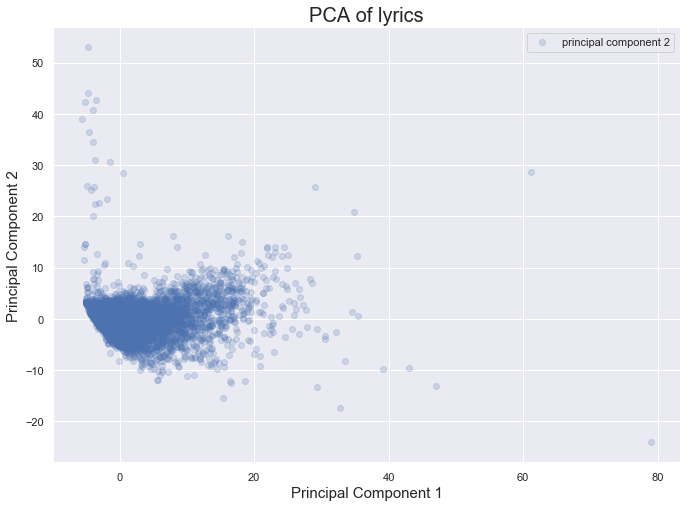

In [23]:
sns.set()

f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of lyrics', fontsize = 20)
ax.scatter(principalDf_a['principal component 1']
               , principalDf_a['principal component 2'],alpha=0.2)
ax.legend()
#ax.set_xlim([-2.5,1000])
#ax.set_ylim([-2.5,1000])
plt.show()

In [ ]:
#clusterings = [AgglomerativeClustering(n_clusters=i).fit(tbl) for i in range(2,21)]

In [92]:
#for i,clustering in enumerate(clusterings,2):
#    print("{}-many clusters".format(i))
#    cnts=Counter(clustering.labels_)
#    print(cnts)
#    print("avg cluster sz",np.mean(list(cnts.values())))
#    print("sd of cluster sz",np.var(list(cnts.values()))**0.5)

2-many clusters
Counter({0: 11650, 1: 1776})
avg cluster sz 6713.0
sd of cluster sz 4937.0
3-many clusters
Counter({1: 7090, 2: 4560, 0: 1776})
avg cluster sz 4475.333333333333
sd of cluster sz 2170.257332412193
4-many clusters
Counter({1: 7090, 2: 4560, 0: 1224, 3: 552})
avg cluster sz 3356.5
sd of cluster sz 2636.2952698815816
5-many clusters
Counter({0: 7090, 2: 4560, 1: 958, 3: 552, 4: 266})
avg cluster sz 2685.2
sd of cluster sz 2694.5659687600896
6-many clusters
Counter({2: 4560, 0: 3761, 5: 3329, 1: 958, 3: 552, 4: 266})
avg cluster sz 2237.6666666666665
sd of cluster sz 1696.627700927801
7-many clusters
Counter({2: 4560, 1: 3702, 5: 3329, 0: 958, 3: 552, 4: 266, 6: 59})
avg cluster sz 1918.0
sd of cluster sz 1737.2507837713833
8-many clusters
Counter({0: 4560, 1: 3702, 5: 3329, 3: 750, 7: 552, 4: 266, 2: 208, 6: 59})
avg cluster sz 1678.25
sd of cluster sz 1733.2471513030102
9-many clusters
Counter({0: 3702, 1: 3533, 5: 3329, 8: 1027, 3: 750, 7: 552, 4: 266, 2: 208, 6: 59})
avg

In [24]:
#cl_choice = clusterings[9-2]
cl_choice = AgglomerativeClustering(n_clusters=9).fit(tbl)

c:\users\craut\miniconda3\envs\music_econ\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(13426, 2)


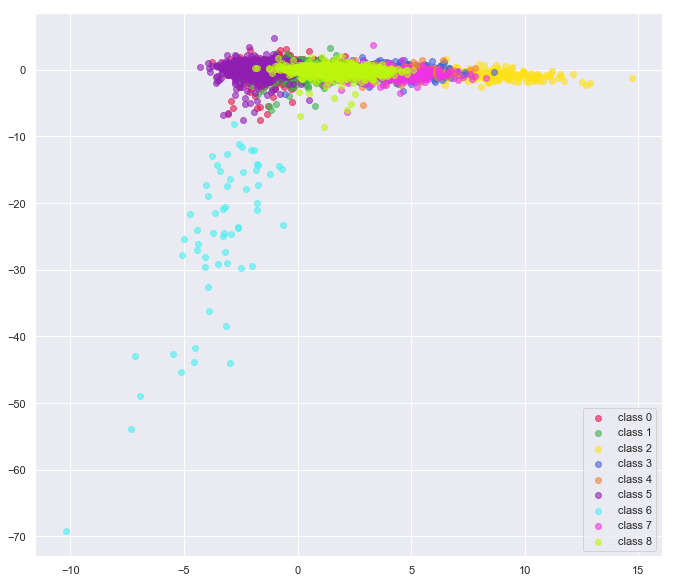

In [25]:
X_train,y_train=tbl,cl_choice.labels_

LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(y_train),colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,alpha=0.6,label="class {}".format(l))
ax0.legend(loc='lower right')

In [26]:
len(set(songs_releasedate.values()))/12*2

120.83333333333333

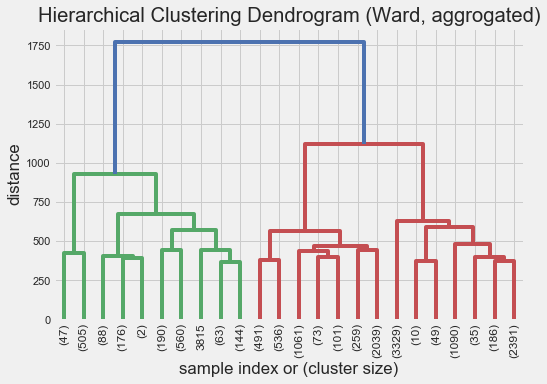

In [28]:
linkage_matrix = linkage(tbl, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

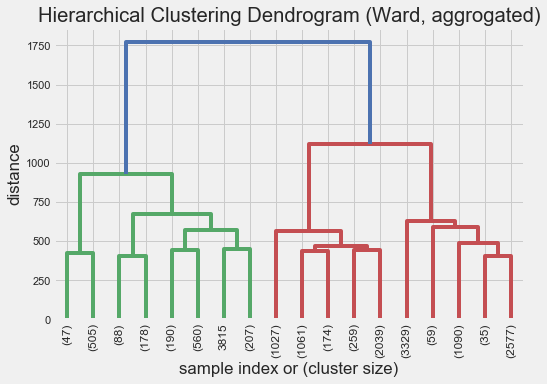

In [29]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=18,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [48]:
STP = set(stopwords.words("english"))
custom_stops = {"la","get","thi","i'm"}
for cus in custom_stops:
    STP.add(cus)

def cloud(d):
    wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies({k:d[k] for k in d if d[k]>0 and k not in STP})
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

['sauce it up', 'lil uzi vert']


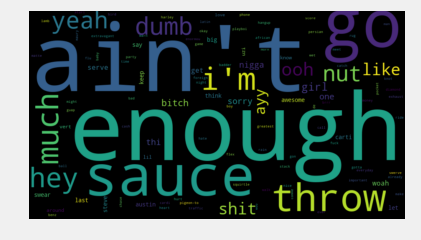

In [39]:
song_i = 0
print(top_top_songs[song_i][:2])
cloud(top_top_songs[song_i][2])

In [45]:
vec_add = lambda v1,v2: [e1+e2 for e1,e2 in zip(v1,v2)]
sc_mult = lambda a,v: [a*e for e in v]
grp_freq = {}
for i,r in enumerate(tbl):
    lbl = cl_choice.labels_[i]
    if lbl not in grp_freq:
        grp_freq[lbl] = list(r)
    else:
        grp_freq[lbl] = vec_add(grp_freq[lbl],r)
grp_szs = Counter(cl_choice.labels_)
#for g in grp_freq:
#    grp_freq[g] = sc_mult(1/grp_szs[g],grp_freq[g])
print(len(grp_freq))

9


Group: 4


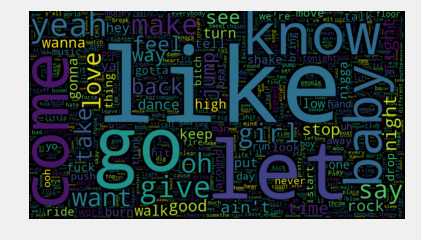

Group: 0


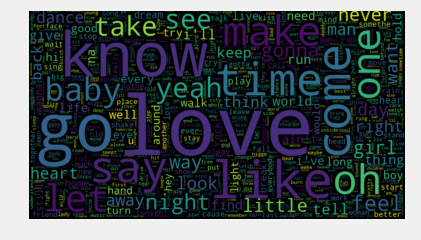

Group: 5


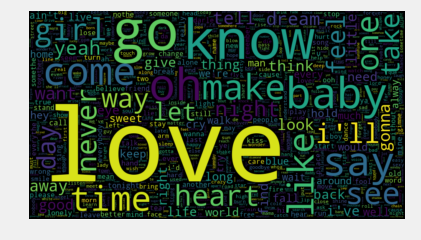

Group: 3


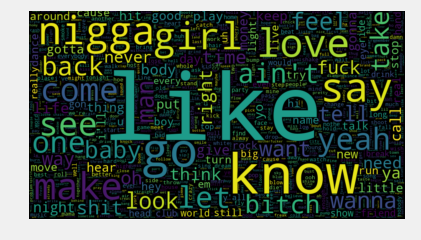

Group: 1


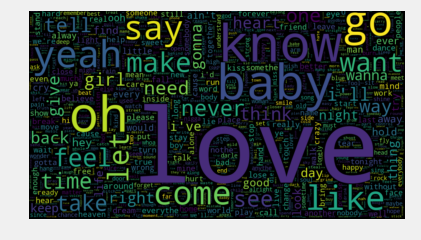

Group: 7


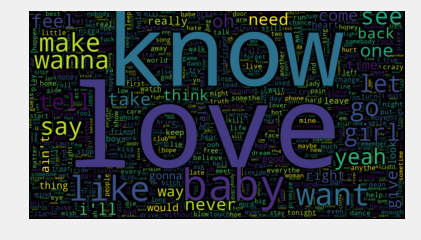

Group: 8


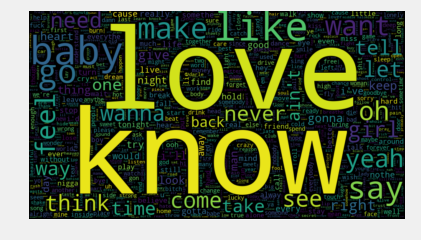

Group: 6


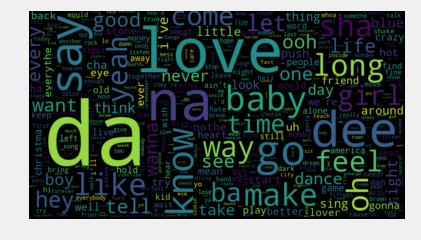

Group: 2


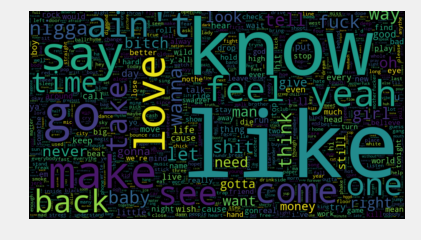

In [49]:
for grp in grp_freq:
    print("Group: {}".format(grp))
    cnts = grp_freq[grp]
    dic = {w:cnts[i] for i,w in enumerate(words) if cnts[i]>1}
    cloud(dic)

In [47]:
for grp in grp_freq:
    print("Group: {}".format(grp))
    cnts = grp_freq[grp]
    dic = {w:cnts[i] for i,w in enumerate(words) if cnts[i]>0 and w not in STP}
    freq_ord = sorted([(dic[k],k) for k in dic],reverse=True)
    print(freq_ord[:20])

Group: 4
[(3468.333333333333, 'get'), (1177.4999999999995, 'like'), (1163.1666666666667, "i'm"), (918.5, 'let'), (860.6666666666667, 'go'), (757.8333333333334, 'come'), (747.3333333333335, 'know'), (665.6666666666666, 'baby'), (653.6666666666666, 'yeah'), (642.3333333333335, 'thi'), (604.3333333333334, 'give'), (574.4999999999999, 'make'), (550.6666666666666, 'oh'), (536.0, 'girl'), (518.5, 'say'), (515.3333333333333, 'want'), (501.4999999999999, 'love'), (471.6666666666667, 'take'), (445.83333333333326, 'back'), (432.3333333333333, 'feel')]
Group: 0
[(9264.500000000013, 'get'), (8063.333333333327, "i'm"), (7892.500000000001, 'love'), (6379.833333333336, 'go'), (5948.333333333335, 'know'), (4984.333333333333, 'like'), (4622.166666666667, 'come'), (4322.5, 'time'), (4321.000000000002, 'thi'), (4190.000000000002, 'say'), (3958.333333333335, 'make'), (3908.6666666666697, 'oh'), (3845.4999999999995, 'one'), (3554.6666666666674, 'let'), (3518.333333333333, 'baby'), (3476.666666666669, 'yeah